In [1]:
import networkx as nx
import numpy as np
import pandas as pd

# for the explode statement; convert string to list
from ast import literal_eval

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [2]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [4]:
data = r'data/arxiv_osint.csv'

df = pd.read_csv(data)

df['date_published'] = pd.to_datetime(df['date_published'])
df['authors'] = df['authors'].apply(literal_eval)

df.head()

,date_published,title,authors,summary,url,category
0,2023-10-03 11:42:29+00:00,Online Multimedia Verification with Computatio...,"[Sohail Ahmed Khan, Jan Gunnar Furuly, Henrik ...",This paper investigates the use of computation...,http://arxiv.org/pdf/2310.01978v1,cs.MM
1,2023-09-06 19:03:49+00:00,C-CLIP: Contrastive Image-Text Encoders to Clo...,"[William Theisen, Walter Scheirer]",The interplay between the image and comment on...,http://arxiv.org/pdf/2309.03921v1,cs.CV
2,2023-07-27 23:03:57+00:00,A Secure Open-Source Intelligence Framework Fo...,"[Sylvia Worlali Azumah, Victor Adewopo, Zag El...",Cyberbullying has become a pervasive issue bas...,http://arxiv.org/pdf/2307.15225v2,cs.CY
3,2023-06-09 18:18:58+00:00,The Use of Public Data and Free Tools in Natio...,"[Sharifah Roziah Binti Mohd Kassim, Shujun Li,...","Many CSIRTs, including national CSIRTs, routin...",http://arxiv.org/pdf/2306.07988v1,cs.DL
4,2023-04-24 09:53:33+00:00,ThreatCrawl: A BERT-based Focused Crawler for ...,"[Philipp Kuehn, Mike Schmidt, Markus Bayer, Ch...",Publicly available information contains valuab...,http://arxiv.org/pdf/2304.11960v2,cs.CR


In [5]:
df.shape

(16, 6)

# Dates

In [6]:
df['date_ym'] = df['date_published'].dt.strftime('%Y-%m')

df.head()

,date_published,title,authors,summary,url,category,date_ym
0,2023-10-03 11:42:29+00:00,Online Multimedia Verification with Computatio...,"[Sohail Ahmed Khan, Jan Gunnar Furuly, Henrik ...",This paper investigates the use of computation...,http://arxiv.org/pdf/2310.01978v1,cs.MM,2023-10
1,2023-09-06 19:03:49+00:00,C-CLIP: Contrastive Image-Text Encoders to Clo...,"[William Theisen, Walter Scheirer]",The interplay between the image and comment on...,http://arxiv.org/pdf/2309.03921v1,cs.CV,2023-09
2,2023-07-27 23:03:57+00:00,A Secure Open-Source Intelligence Framework Fo...,"[Sylvia Worlali Azumah, Victor Adewopo, Zag El...",Cyberbullying has become a pervasive issue bas...,http://arxiv.org/pdf/2307.15225v2,cs.CY,2023-07
3,2023-06-09 18:18:58+00:00,The Use of Public Data and Free Tools in Natio...,"[Sharifah Roziah Binti Mohd Kassim, Shujun Li,...","Many CSIRTs, including national CSIRTs, routin...",http://arxiv.org/pdf/2306.07988v1,cs.DL,2023-06
4,2023-04-24 09:53:33+00:00,ThreatCrawl: A BERT-based Focused Crawler for ...,"[Philipp Kuehn, Mike Schmidt, Markus Bayer, Ch...",Publicly available information contains valuab...,http://arxiv.org/pdf/2304.11960v2,cs.CR,2023-04


In [7]:
agg_df = df[['date_ym', 'title']].groupby('date_ym').count()

agg_df.columns = ['paper_count']

agg_df.head()

,paper_count
date_ym,
2016-08,1
2018-03,1
2018-07,1
2019-01,2
2019-10,1


In [8]:
agg_df.tail()

,paper_count
date_ym,
2023-04,1
2023-06,1
2023-07,1
2023-09,1
2023-10,1


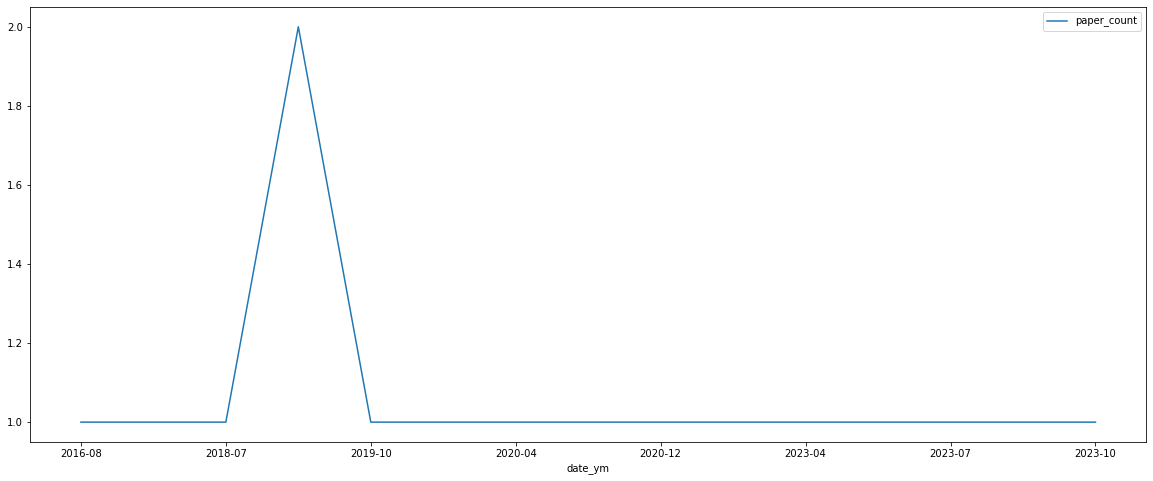

In [9]:
_= agg_df.plot(figsize=(20,8))

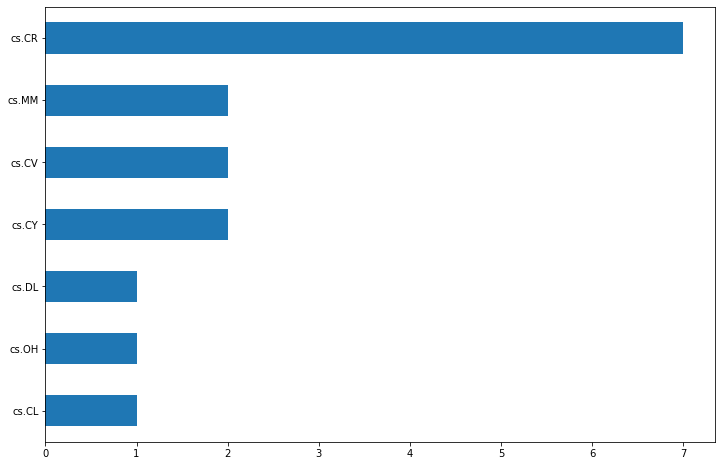

In [10]:
df['category'].value_counts()[0:20].plot.barh(figsize=(12,8)).invert_yaxis()

In [11]:
def show_category_titles(df):
    
    df = df.copy()
    
    categories = list(df['category'].value_counts().index)

    for category in categories:

        print('Category: {}'.format(category))
        print()

        titles = sorted(df[df['category']==category]['title'])
        
        for title in titles:
            print(title)

        print()
        print('-------------------')
        print()

In [12]:
# you can read about the categories here: https://arxiv.org/category_taxonomy
# cs.NE Computer Science: (Neural and Evolutionary Computing)
# cs.AI Computer Science: (Artificial Intelligence)
# nlin.AO Nonlinear Sciences: (Adaptation and Self-Organizing Systems)

# Artificial Life is approached from different sciences
# But nlin.AO could be cool to zoom in on and explore

show_category_titles(df)

Category: cs.CR

A First Look at the Crypto-Mining Malware Ecosystem: A Decade of Unrestricted Wealth
A machine-learning approach to Detect users' suspicious behaviour through the Facebook wall
Generating Fake Cyber Threat Intelligence Using Transformer-Based Models
Is Cryptojacking Dead after Coinhive Shutdown?
OSINT Analysis of the TOR Foundation
Smarter Password Guessing Techniques Leveraging Contextual Information and OSINT
ThreatCrawl: A BERT-based Focused Crawler for the Cybersecurity Domain

-------------------

Category: cs.MM

Online Multimedia Verification with Computational Tools and OSINT: Russia-Ukraine Conflict Case Studies
PicHunt: Social Media Image Retrieval for Improved Law Enforcement

-------------------

Category: cs.CV

C-CLIP: Contrastive Image-Text Encoders to Close the Descriptive-Commentative Gap
Objects of violence: synthetic data for practical ML in human rights investigations

-------------------

Category: cs.CY

A Secure Open-Source Intelligence Framework

In [14]:
search_title = 'Online Multimedia Verification with Computational Tools and OSINT: Russia-Ukraine Conflict Case Studies'

url = df[df['title']==search_title]['url'].values[0]
print(url)

http://arxiv.org/pdf/2310.01978v1


In [ ]:
# Today's Goal will be to find the signal that I want; Artificial Life, not Artificial Intelligence